In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-top-250-movies/movies.csv
/kaggle/input/imdb-top-250-movies/datasets/year.csv
/kaggle/input/imdb-top-250-movies/datasets/writters.json
/kaggle/input/imdb-top-250-movies/datasets/basic_movie_info.csv
/kaggle/input/imdb-top-250-movies/datasets/person_role_specific.csv
/kaggle/input/imdb-top-250-movies/datasets/basic_member_info.csv
/kaggle/input/imdb-top-250-movies/datasets/person_movie_specific.csv
/kaggle/input/imdb-top-250-movies/datasets/genre.json
/kaggle/input/imdb-top-250-movies/datasets/cast.json
/kaggle/input/imdb-top-250-movies/datasets/directors.json
/kaggle/input/imdb-top-250-movies/datasets/year.json
/kaggle/input/imdb-top-250-movies/datasets/members.csv


In [11]:
df=pd.read_csv('/kaggle/input/imdb-top-250-movies/movies.csv')
df

,rank,id,name,year,imbd_votes,imdb_rating,certificate,duration,genre,cast_id,cast_name,director_id,director_name,writter_name,writter_id,img_link
0,1,tt0111161,The Shawshank Redemption,1994,2601152,9.3,A,142,Drama,"nm0000209,nm0000151,nm0348409,nm0006669,nm0000...","Tim Robbins,Morgan Freeman,Bob Gunton,William ...",nm0001104,Frank Darabont,"Stephen King,Frank Darabont","nm0000175,nm0001104",https://m.media-amazon.com/images/M/MV5BMDFkYT...
1,2,tt0068646,The Godfather,1972,1796656,9.2,A,175,"Crime,Drama","nm0000008,nm0000199,nm0001001,nm0000473,nm0144...","Marlon Brando,Al Pacino,James Caan,Diane Keato...",nm0000338,Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola","nm0701374,nm0000338",https://m.media-amazon.com/images/M/MV5BM2MyNj...
2,3,tt0468569,The Dark Knight,2008,2572662,9.0,UA,152,"Action,Crime,Drama","nm0000288,nm0005132,nm0001173,nm0000323,nm0350...","Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",nm0634240,Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer","nm0634300,nm0634240,nm0275286",https://m.media-amazon.com/images/M/MV5BMTMxNT...
3,4,tt0071562,The Godfather Part II,1974,1237934,9.0,A,202,"Crime,Drama","nm0000199,nm0000134,nm0000380,nm0000473,nm0001...","Al Pacino,Robert De Niro,Robert Duvall,Diane K...",nm0000338,Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo","nm0000338,nm0701374",https://m.media-amazon.com/images/M/MV5BMWMwMG...
4,5,tt0050083,12 Angry Men,1957,768548,9.0,U,96,"Crime,Drama","nm0000020,nm0002011,nm0000842,nm0275835,nm0550...","Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",nm0001486,Sidney Lumet,Reginald Rose,nm0741627,https://m.media-amazon.com/images/M/MV5BMWU4N2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,tt15097216,Jai Bhim,2021,190981,8.9,A,164,"Crime,Drama,Mystery","nm1421814,nm7934649,nm8904193,nm8135195,nm0695...","Suriya,Lijo Mol Jose,Manikandan K.,Rajisha Vij...",nm4377096,T.J. Gnanavel,"T.J. Gnanavel,Rajendra Sapre","nm4377096,nm13222819",https://m.media-amazon.com/images/M/MV5BYzgwOD...
246,247,tt0103639,Aladdin,1992,406751,8.0,U,90,"Animation,Adventure,Comedy","nm0918334,nm0000245,nm0488306,nm0293455,nm0919...","Scott Weinger,Robin Williams,Linda Larkin,Jona...","nm0166256,nm0615780","Ron Clements,John Musker","Ron Clements,John Musker,Ted Elliott","nm0166256,nm0615780,nm0254645",https://m.media-amazon.com/images/M/MV5BMTM5OT...
247,248,tt0083987,Gandhi,1982,228938,8.1,U,191,"Biography,Drama","nm0001426,nm0000024,nm0368990,nm0786022,nm0000...","Ben Kingsley,John Gielgud,Rohini Hattangadi,Ro...",nm0000277,Richard Attenborough,John Briley,nm0109300,https://m.media-amazon.com/images/M/MV5BY2Q2ND...
248,249,tt1454029,The Help,2011,451856,8.1,UA,146,Drama,"nm1297015,nm0205626,nm0818055,nm0397171,nm1567...","Emma Stone,Viola Davis,Octavia Spencer,Bryce D...",nm0853238,Tate Taylor,"Tate Taylor,Kathryn Stockett","nm0853238,nm3543826",https://m.media-amazon.com/images/M/MV5BOGVmZG...


In [12]:
df.isnull().sum()

rank             0
id               0
name             0
year             0
imbd_votes       0
imdb_rating      0
certificate      1
duration         0
genre            0
cast_id          0
cast_name        0
director_id      0
director_name    0
writter_name     0
writter_id       0
img_link         0
dtype: int64

**TOP 5 MOVIES ACCORDING TO IMDB RATING**

In [13]:
for name in df.head(5)['name'].values:
    print(name)

The Shawshank Redemption
The Godfather
The Dark Knight
The Godfather Part II
12 Angry Men


**TOP 5 MOST VOTED MOVIES**

In [14]:
for name in df.sort_values(by= 'imbd_votes',ascending=False).head(5)['name'].values:
    print(name)

The Shawshank Redemption
The Dark Knight
Inception
Fight Club
Forrest Gump


**UNIQUE GENRES AND THEIR COUNT**

In [15]:
genres=[]
for genre in df['genre']:
    genres+=genre.split(',')
unique_genre=list(set(genres))

In [16]:
for gen in unique_genre:
    count=0
    for genre in df['genre']:
        if (gen in genre):
            count+=1
    print(gen , count)

Biography 29
Western 6
Music 5
Drama 177
Romance 23
Comedy 47
Family 13
Musical 1
Horror 6
Animation 23
Adventure 59
Thriller 30
Film-Noir 4
Sport 5
Sci-Fi 20
Fantasy 16
Action 49
War 23
Crime 51
Mystery 31
History 10


**LIST OF OLDEST MOVIES IN THE DATA**

In [22]:
for i in df.sort_values(by=['year'],ascending=True).head()['name'].values:
    print(i)

The Kid
Sherlock Jr.
The Gold Rush
The General
Metropolis


**MOST NUMBER OF MOVIES BY A DIRECTOR**

In [23]:
temp_dir=[]
for i in df['director_name']:
    j=i.split(',')
    temp_dir+=j
director_list = list(set(temp_dir))

dir_list = []
for i in director_list:
    dir_cnt = 0
    for j in df['director_name']:
        if (i in j):
            dir_cnt+=1
    dir_list.append([i,dir_cnt])  

dir_list    

df_dir = pd.DataFrame(dir_list,columns=['director','no_of_movies'])
df_dir.sort_values(by=['no_of_movies'],ascending=False).head()

,director,no_of_movies
51,Christopher Nolan,7
168,Steven Spielberg,7
85,Martin Scorsese,7
121,Akira Kurosawa,7
66,Stanley Kubrick,7


**MOST NUMBER OF MOVIES BY AN ACTOR**

In [24]:
temp_act=[]
for i in df['cast_name']:
    j=i.split(',')
    temp_act+=j
actor_list = list(set(temp_act))

act_list = []
for i in actor_list:
    act_cnt = 0
    for j in df['cast_name']:
        if (i in j):
            act_cnt+=1
    act_list.append([i,act_cnt])  

act_list    

df_act = pd.DataFrame(act_list,columns=['actor','no_of_movies'])
df_act.sort_values(by=['no_of_movies'],ascending=False).head()

,actor,no_of_movies
2544,Robert De Niro,9
2763,Harrison Ford,7
2197,Morgan Freeman,7
3803,John Ratzenberger,7
2169,Leonardo DiCaprio,6


**TYPE OF CERTIFICATE WITH MOST MOVIES**

<Axes: xlabel='certificate'>

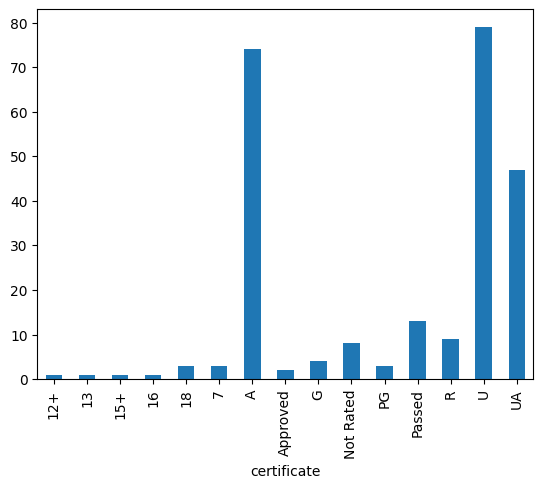

In [25]:
df.groupby('certificate')['id'].count().plot(kind='bar')

**PLOTTING TOP 10 MOVIES WITH IMDB RATING**

In [29]:
df = df.sort_values('imdb_rating')[['name','imdb_rating']].sort_values(by = 'imdb_rating',ascending=False)[:10]

fig =px.bar(df,
            x       = 'name',
            y       = 'imdb_rating',
            color   = 'name',
            labels  = {'name': 'Movies Name'},
            color_discrete_sequence = px.colors.qualitative.Dark2,
            template='plotly_dark',
            title   ='<b> Top 10 Movies by IMDB Rating'
           )

fig.show()